# Redukcja wymiarowości
Aleksander Mendyk, aleksander.mendyk@uj.edu.pl 

## 1. Co to znaczy redukcja wymiarowości i dlaczego musimy to robić?

Przekleństwo nadwymiarowości (ang. curse of dimensionality) to podstawowa przyczyna powszechanego stosowania metod selekcji zmiennych kluczowych podczas budowy modelu. Im większa jest liczba zmiennych sterujących tym trudniej jest model zinterpretować i co więcej trudniej jest dobrać parametry modelu. Aktualnie posiadane przez nas metody matematyczne a nawet heurystyczne są po prostu wciąż niewystarczające.

Redukcja nadwymiarowości to nie tylko ucieczka od problemów z niedoskonałością narzędzi. To także sposób na selekcję zmiennych kluczowych. Przez analizę fizycznego charakteru tych zmiennych można wywnioskować jakie są potencjalne mechanizmy sterujące badanym zjawiskiem, a dzięki temu zbudować hipotezę naukową, którą kolejno mozna sfalsyfikować lub obronić. W ten sposób modelowanie empiryczne staje się pomału narzędziem wspomagającym zdobywanie wiedzy w sposób indukcyjny tj. bezpośrednio na podstawie obserwowanych danych, bez konieczności używania znanych już teorii.

Wielbiciele klasyfikacji wszelkich rodzajów pokazują 3 możliwe sposoby na selekcję zmiennych kluczowych:
1. Filter Method  <br> 
Filtrowanie jak sama nazwa wskazuje poleg na przepuszczeniu danych przez narzędzie, które będzie potrafiło nadać od razu bez modelowania jakieś współczynniki wartościujące wpływ jeden zmiennej na drugą (np. wyjściową). Przykładem może być analiza korelacyjna. <br> 
2. Wrapper Method  <br> 
W tej grupie używamy narzędzi machine learning (ML) do uczenia się danych i zależności pomiędzy nimi. Narzędzie takie jak np `SelectKBest` czy `RFE` (Recursive Feature Elimination) spełniają kryteria Wrapper Method <br> 

3. Embedded Method <br> 

To metody które pracują w oparciu o modelowanie ale ze statystyczną oceną wpływu dodanych i/lub usuniętych zmiennych z naciskiem na tę ostatnią czynność - w końcu mamy redukować wymiar wektora wejściowego


## 2. Baza danych

Baza danych dotyczy epidemiologicznych rozważań nad przyczynami zachorowań na cukrzycę u Indian Pima, "Ludzi Rzeki". 

Wejścia:
   1. Number of times pregnant `Pregnancy`
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test `Glucose`
   3. Diastolic blood pressure (mm Hg) `blood pressure`
   4. Triceps skin fold thickness (mm) `skin thickness`
   5. 2-Hour serum insulin (mu U/ml) `test insulin`
   6. Body mass index (weight in kg/(height in m)^2) `BMI`
   7. Diabetes pedigree function `pedigree`
   8. Age (years) `age`
   9. Class variable (0 or 1) `diabetic [Y/N]`
   
 
   
2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

## 3. Import bibliotek i danych

In [1]:
# load libraries
from pandas import read_csv
from numpy import set_printoptions,sort
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
# load data
filename = 'pima-indians-diabetes.csv'
names = ['Pregnancy', 'Glucose', 'blood pressure', 'skin thickness', 'test insulin', 'BMI', 'pedigree', 'age', 'diabetic [Y/N]']
dataframe = read_csv(filename, names=names)
dataframe.head()


,Pregnancy,Glucose,blood pressure,skin thickness,test insulin,BMI,pedigree,age,diabetic [Y/N]
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4. Zróbmy analizę korelacyjną

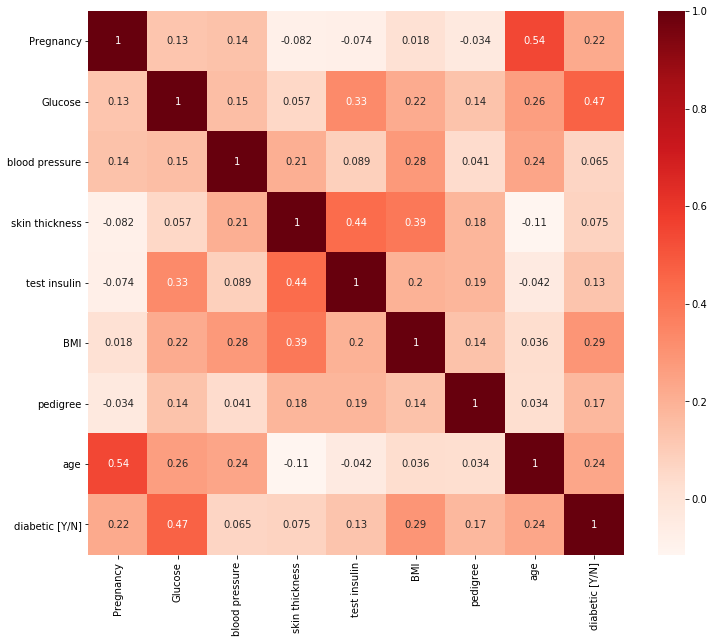

In [2]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataframe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Może coś bardziej zautomatyzowanego?

Zastosujemy narzędzie `SelectKBest`

In [3]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print('Względne ważności poszczególnych zmiennych')
print(names[0:8])
print(fit.scores_)
columns = np.array(names[0:8])
my_importances = np.array(fit.scores_)
my_indices=np.argsort(my_importances)[::-1]
print(my_indices)
print('Zmienne od najważniejszej do najmniej ważnej')
print(columns[my_indices])

Względne ważności poszczególnych zmiennych
['Pregnancy', 'Glucose', 'blood pressure', 'skin thickness', 'test insulin', 'BMI', 'pedigree', 'age']
[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[1 5 7 0 6 4 3 2]
Zmienne od najważniejszej do najmniej ważnej
['Glucose' 'BMI' 'age' 'Pregnancy' 'pedigree' 'test insulin'
 'skin thickness' 'blood pressure']


#### Automatyczna trasnsformacja zbioru z uwzględnieniem tylko najważniejszych wejść

In [4]:
features = fit.transform(X)
# summarize selected features
print(features)

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 ...
 [  5.  121.   26.2  30. ]
 [  1.  126.   30.1  47. ]
 [  1.   93.   30.4  23. ]]


## A gdzie moje ukochane ML?

#### Użyjemy `Extra Trees`

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)
my_indices=np.argsort(model.feature_importances_)[::-1]
print(my_indices)
print('Zmienne od najważniejszej do najmniej ważnej')
print(columns[my_indices])

[0.118 0.249 0.096 0.08  0.071 0.134 0.118 0.134]
[1 5 7 6 0 2 3 4]
Zmienne od najważniejszej do najmniej ważnej
['Glucose' 'BMI' 'age' 'pedigree' 'Pregnancy' 'blood pressure'
 'skin thickness' 'test insulin']


## 6. A teraz zobaczymy pierwszy przykład selekcji zmiennych kluczowych typu Wrapper Method 
#### Użyjemy metody `RFE` która pracuje na modelu regresji logistycznej


In [6]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs',max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Liczba zmiennych: %d" % fit.n_features_)
print("Wyselekcjonowane zmienne: %s" % fit.support_)
print("Ranking zmiennych: %s" % fit.ranking_)


Liczba zmiennych: 3
Wyselekcjonowane zmienne: [ True False False False False  True  True False]
Ranking zmiennych: [1 2 4 6 5 1 1 3]


#### A skąd wiemy że 3 zmienne wystarczą? 
Trzeba by to sprawdzić...

In [7]:
#no of features
no_of_columns=len(dataframe.columns)-1
print(no_of_columns)
nof_list=np.arange(1,no_of_columns)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

8
Optimum number of features: 6
Score with 6 features: 0.779221


## 7. A teraz zobaczymy pierwszy przykład selekcji zmiennych kluczowych typu Embedded Method 
#### `Lasso`regresja z regularyzacją 

Best alpha using built-in LassoCV: 0.007166
Best score using built-in LassoCV: 0.301033
0    0.019411
1    0.005977
2   -0.002318
3    0.000300
4   -0.000160
5    0.013302
6    0.077642
7    0.002803
dtype: float64
Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

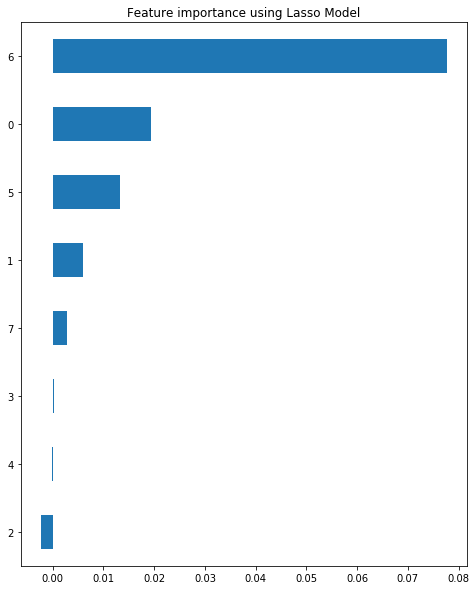

In [8]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = pd.DataFrame(X).columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## 8. Analiza składowych głównych
#### `PCA`

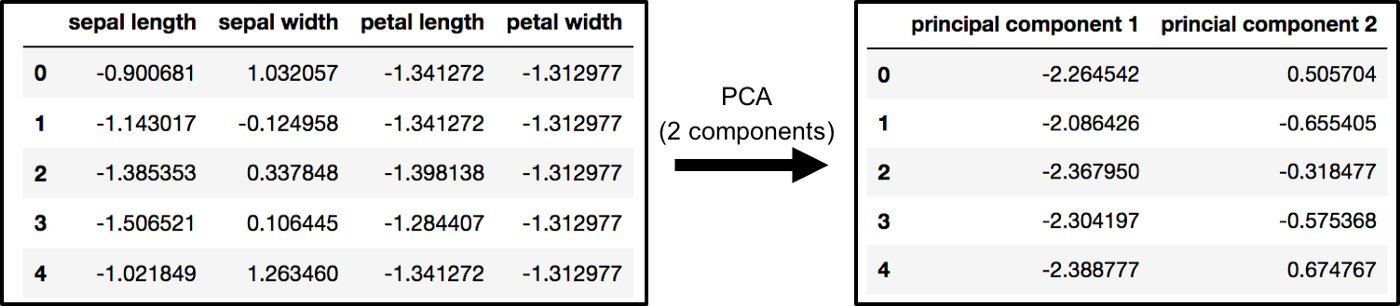
- PCA1 = a*X1+b*X2+c*X3
- PCA1 = d*X1+e*X4

In [9]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#X_train, X_test, y_train, y_test
           
pca = PCA(n_components=0.95)
fit = pca.fit(X_train_scaled)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print('') 
print("The components are: %s" % fit.components_)
print('logistic regression')
train_img = fit.transform(X_train_scaled)
test_img = pca.transform(X_test_scaled)
model.fit(train_img,y_train)
print("Model score is %s" % model.score(test_img,y_test))

Explained Variance: [0.261 0.22  0.129 0.11  0.095 0.084 0.052]

The components are: [[ 0.05   0.383  0.339  0.469  0.446  0.47   0.289  0.112]
 [ 0.594  0.248  0.216 -0.284 -0.186 -0.07  -0.072  0.643]
 [-0.037  0.44  -0.567 -0.217  0.414 -0.361  0.359  0.079]
 [ 0.017 -0.349  0.082 -0.031 -0.312 -0.007  0.875  0.085]
 [ 0.514 -0.493 -0.229  0.503  0.322 -0.273 -0.062  0.071]
 [ 0.225  0.059 -0.655  0.077 -0.318  0.64  -0.025 -0.001]
 [-0.571 -0.201 -0.169  0.197  0.015  0.028 -0.112  0.744]]
logistic regression
Model score is 0.7878787878787878


### Jakiś zysk? <br>


## 9. Wróćmy do podstaw

#### Regresja liniowa

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)
model.get_params()
print(model.coef_)
print(model.intercept_)

coefficient of determination: 0.303253095650892
[ 0.021  0.006 -0.002  0.    -0.     0.013  0.147  0.003]
-0.8538942664855471


## 10. Najwyższy czas na coś bardziej zaawansowanego

In [11]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Tue, 26 May 2020   Prob (F-statistic):           7.36e-55
Time:                        03:59:51   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8539      0.085     -9.989      0.0

# That's NOT all folks! 
No bo kto ma wreszcie tutaj rację?